# Creating Bar Charts & Importing CSVs

In [37]:
from matplotlib import pyplot as plt
import numpy as np
import csv
from collections import Counter
import pandas as pd

## Bar Charts

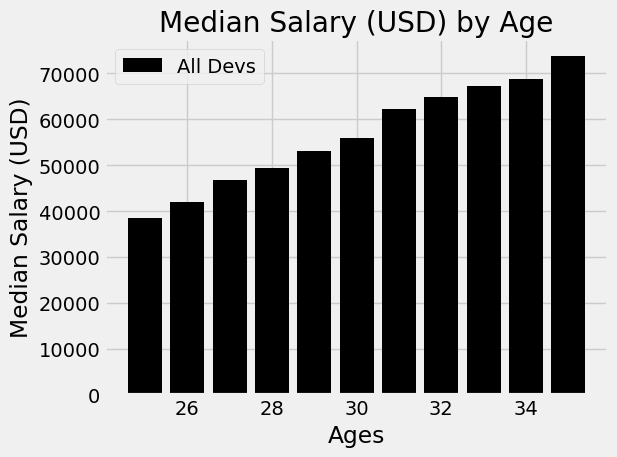

In [38]:
plt.style.use('fivethirtyeight')

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
plt.bar(ages_x, dev_y, color='k', label='All Devs')

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.legend()
plt.tight_layout()
plt.show()

### Displaying Multiple Bars in a single X-Value

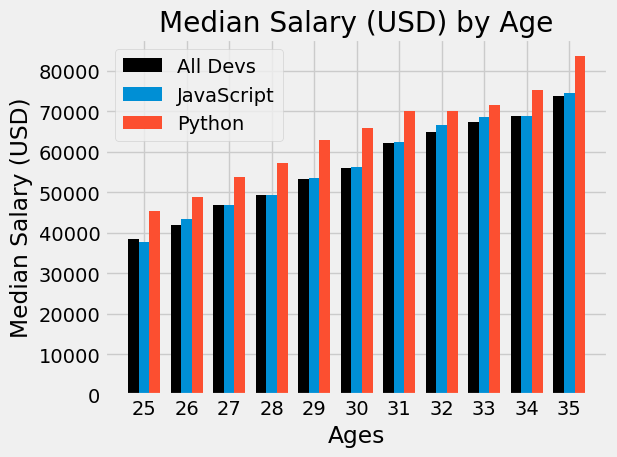

In [39]:
plt.style.use('fivethirtyeight')

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

x_indexes = np.arange(len(ages_x)) # created to group bars together
width = 0.25 # width of a single bar

# each plt.bar function was given the width variable to set the bar width to 0.25
dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
plt.bar(x_indexes - width, dev_y, width=width, color='k', label='All Devs') # shifted the x location one bar width to the left

js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]
plt.bar(x_indexes, js_dev_y, width=width, label='JavaScript') # x location remains unaffected

py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]
plt.bar(x_indexes + width, py_dev_y, width=width, label='Python') # shifted the x location one bar width to the right

plt.xticks(ticks=x_indexes, labels=ages_x) # bars remained group by indexes, but labels change to corresponding ages_x value
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.legend()
plt.tight_layout()
plt.show()

## Plotting CSV File Data

### Using CSV Standard Library

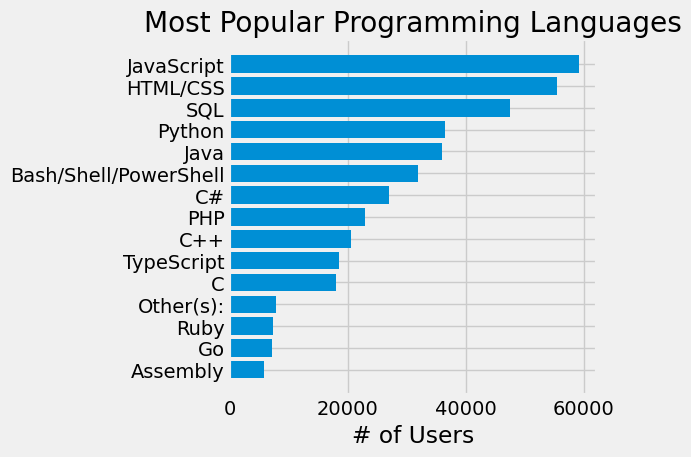

In [40]:
plt.style.use('fivethirtyeight')

with open('data.csv') as csv_file: 
    csv_reader = csv.DictReader(csv_file)
    language_counter = Counter()
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))
        
languages = []
popularity = []

for item in language_counter.most_common(15): # most common only shows the 
    languages.append(item[0])
    popularity.append(item[1])

# reverse lists to show responses in descending order
languages.reverse() 
popularity.reverse()

# display a horizontal bar char with plt.barh
plt.barh(languages, popularity)

plt.title('Most Popular Programming Languages')
plt.xlabel('# of Users')

plt.tight_layout()
plt.show()

### Using Pandas

       Responder_id                                LanguagesWorkedWith
0                 1                    HTML/CSS;Java;JavaScript;Python
1                 2                                C++;HTML/CSS;Python
2                 3                                           HTML/CSS
3                 4                                C;C++;C#;Python;SQL
4                 5        C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
...             ...                                                ...
87564         88182                           HTML/CSS;Java;JavaScript
87565         88212                         HTML/CSS;JavaScript;Python
87566         88282  Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;W...
87567         88377                      HTML/CSS;JavaScript;Other(s):
87568         88863  Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...

[87569 rows x 2 columns]


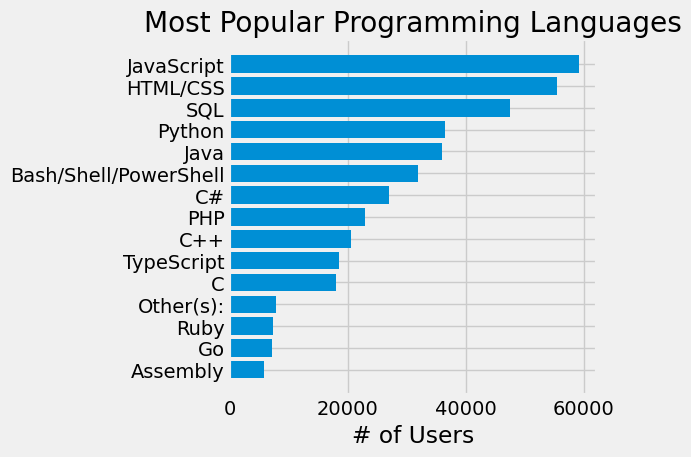

In [42]:
plt.style.use('fivethirtyeight')

data = pd.read_csv('data.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']
    
language_counter = Counter()
for response in lang_responses:
    language_counter.update(response.split(';'))
        
languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title('Most Popular Programming Languages')
plt.xlabel('# of Users')

plt.tight_layout()
plt.show()